# Importing Essential Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the dataset from the excel file
df=pd.read_excel('Customer_Churn_Data_Large.xlsx', sheet_name=None)

# Extracting different sheets from the excel file

In [7]:
Customer_demographics=df['Customer_Demographics']
Customer_demographics.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [9]:
Transaction=df['Transaction_History']
Transaction.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [11]:
Customer=df['Customer_Service']
Customer.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


In [13]:
Activity=df['Online_Activity']
Activity.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


In [15]:
Churn=df['Churn_Status']
Churn.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [17]:
# Merging different sheets into a single dataframe
from functools import reduce
new_df=reduce(lambda left, right: pd.merge(left, right, on='CustomerID', how='outer'), df.values())

In [19]:
new_df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [21]:
new_df.shape

(6812, 17)

In [23]:
new_df.isnull().mean()*100

CustomerID           0.000000
Age                  0.000000
Gender               0.000000
MaritalStatus        0.000000
IncomeLevel          0.000000
TransactionID        0.000000
TransactionDate      0.000000
AmountSpent          0.000000
ProductCategory      0.000000
InteractionID       23.605402
InteractionDate     23.605402
InteractionType     23.605402
ResolutionStatus    23.605402
LastLoginDate        0.000000
LoginFrequency       0.000000
ServiceUsage         0.000000
ChurnStatus          0.000000
dtype: float64

In [25]:
new_df.tail()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
6807,1000,34,M,Widowed,Low,2724,2022-09-08,232.06,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6808,1000,34,M,Widowed,Low,2917,2022-12-13,324.98,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6809,1000,34,M,Widowed,Low,2979,2022-06-15,375.34,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6810,1000,34,M,Widowed,Low,8594,2022-04-08,166.73,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6811,1000,34,M,Widowed,Low,5529,2022-11-23,93.73,Furniture,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0


In [29]:
# Checking all the possible details of the dataframe
new_df.describe()

,CustomerID,Age,TransactionID,TransactionDate,AmountSpent,InteractionID,InteractionDate,LastLoginDate,LoginFrequency,ChurnStatus
count,6812.000000,6812.000000,6812.000000,6812,6812.000000,5204.000000,5204,6812,6812.000000,6812.000000
mean,500.169260,43.274516,5497.323253,2022-07-01 02:11:29.136817408,251.620527,5921.861261,2022-07-01 16:31:10.561106944,2023-07-06 04:56:47.633587712,25.724310,0.198473
min,1.000000,18.000000,1000.000000,2022-01-01 00:00:00,5.180000,2015.000000,2022-01-01 00:00:00,2023-01-01 00:00:00,1.000000,0.000000
25%,247.000000,30.000000,3223.500000,2022-04-02 00:00:00,127.100000,3873.250000,2022-04-07 00:00:00,2023-04-12 00:00:00,14.000000,0.000000
50%,505.500000,44.000000,5515.000000,2022-07-01 00:00:00,251.845000,5903.000000,2022-07-02 00:00:00,2023-07-13 00:00:00,26.000000,0.000000
75%,750.000000,56.000000,7675.250000,2022-09-30 00:00:00,375.280000,7851.000000,2022-09-25 00:00:00,2023-10-01 00:00:00,38.000000,0.000000
max,1000.000000,69.000000,9997.000000,2022-12-31 00:00:00,499.860000,9997.000000,2022-12-30 00:00:00,2023-12-31 00:00:00,49.000000,1.000000
std,286.704642,15.286788,2584.768541,NaN,142.901693,2332.331260,NaN,NaN,14.062032,0.398880


# Performing Exploratory Data Analysis (EDA)

In [42]:
ratio_Gender=new_df.groupby('Age')['Gender'].value_counts().reset_index(name='count')
ratio_Gender.head()

,Age,Gender,count
0,18,F,77
1,18,M,71
2,19,M,96
3,19,F,52
4,20,F,66


In [44]:
ratio_Gender['Ratio']=ratio_Gender['count']/(ratio_Gender.groupby('Age')['count'].transform('sum'))
ratio_Gender.head()

,Age,Gender,count,Ratio
0,18,F,77,0.520270
1,18,M,71,0.479730
2,19,M,96,0.648649
3,19,F,52,0.351351
4,20,F,66,0.511628


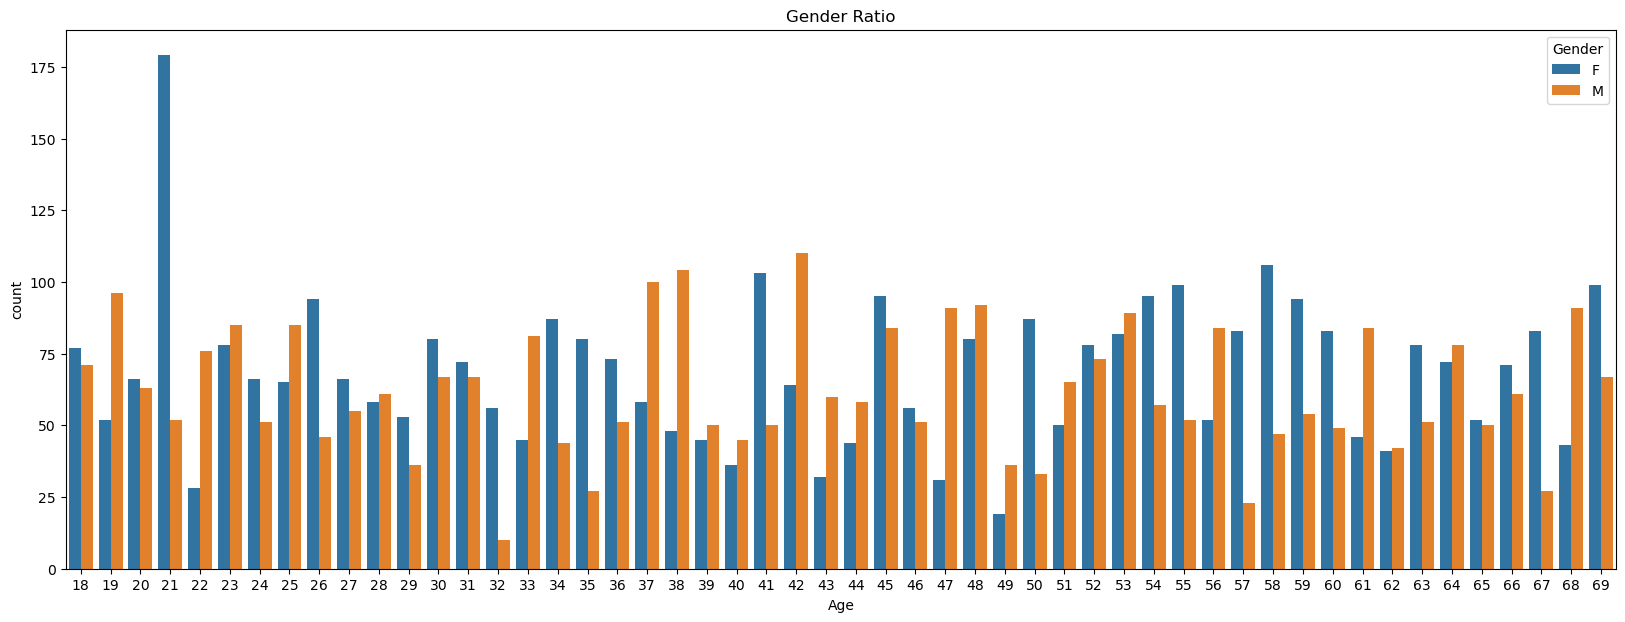

In [46]:
plt.figure(figsize=(20,7))
sns.barplot(data=ratio_Gender, x='Age', y='count', hue='Gender')
plt.title('Gender Ratio')
plt.show()

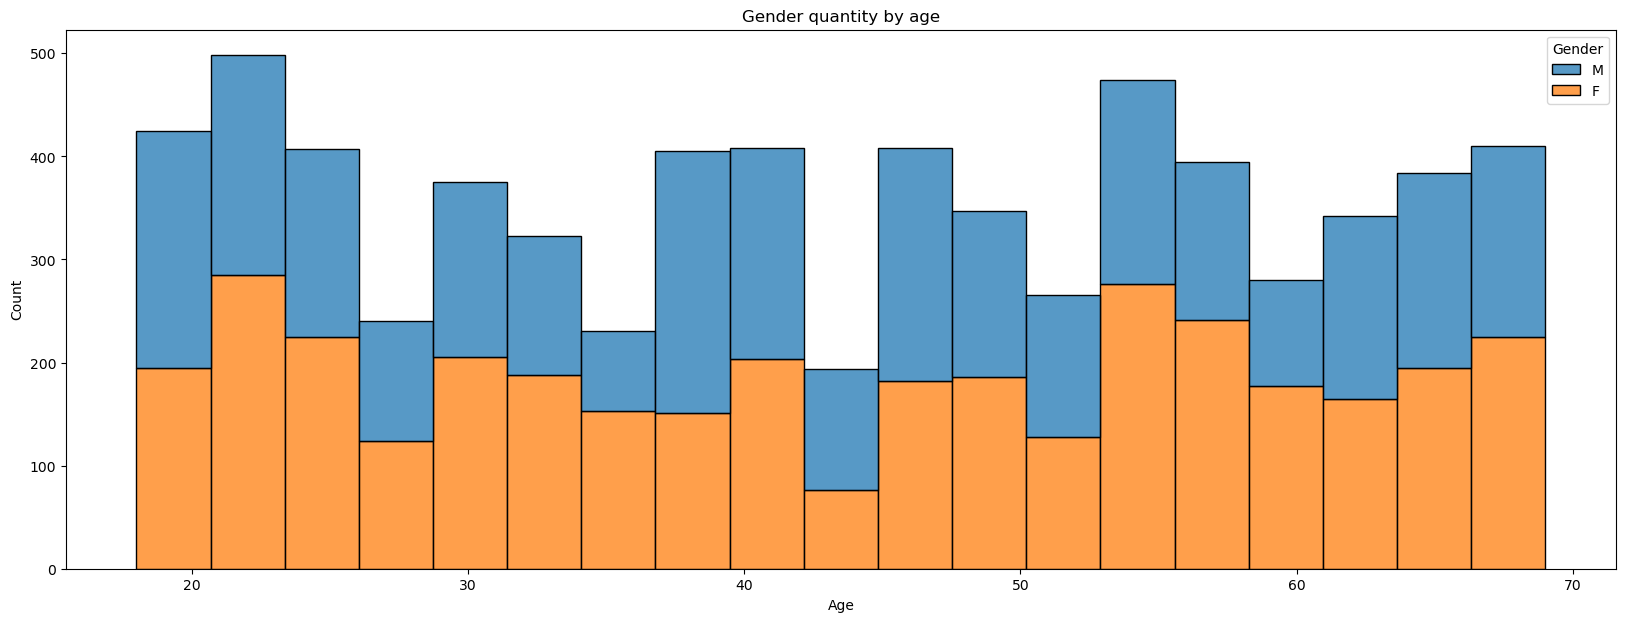

In [47]:
plt.figure(figsize=(20,7))
sns.histplot(data=new_df, x='Age', hue='Gender', multiple='stack')
plt.title('Gender quantity by age')
plt.show()

In [50]:
Marital=new_df.groupby('Gender')['MaritalStatus'].value_counts().reset_index(name='count')
Marital.sample(5)

,Gender,MaritalStatus,count
1,F,Divorced,897
2,F,Single,812
0,F,Widowed,1067
3,F,Married,804
7,M,Single,716


In [52]:
Marital['ratio']=Marital['count']/(Marital.groupby('Gender')['count'].transform('sum'))
Marital.head()

,Gender,MaritalStatus,count,ratio
0,F,Widowed,1067,0.298045
1,F,Divorced,897,0.250559
2,F,Single,812,0.226816
3,F,Married,804,0.224581
4,M,Divorced,896,0.277228


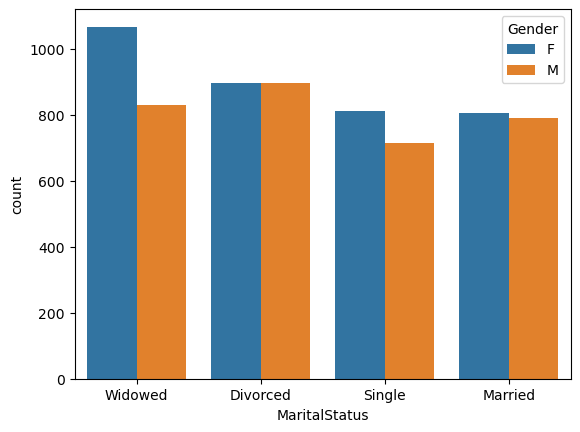

In [54]:
sns.barplot(data=Marital, x='MaritalStatus', y='count', hue='Gender')
plt.show()

In [56]:
Marital_Age=new_df.groupby('Age')['MaritalStatus'].value_counts().reset_index(name='count')
Marital_Age.sample(5)

,Age,MaritalStatus,count
134,51,Single,27
177,62,Single,16
48,30,Married,66
185,64,Divorced,38
53,31,Married,35


In [58]:
Marital_Age['ratio']=Marital['count']/(Marital.groupby('Gender')['count'].transform('sum'))
Marital_Age.head()

,Age,MaritalStatus,count,ratio
0,18,Married,47,0.298045
1,18,Single,45,0.250559
2,18,Divorced,31,0.226816
3,18,Widowed,25,0.224581
4,19,Widowed,57,0.277228


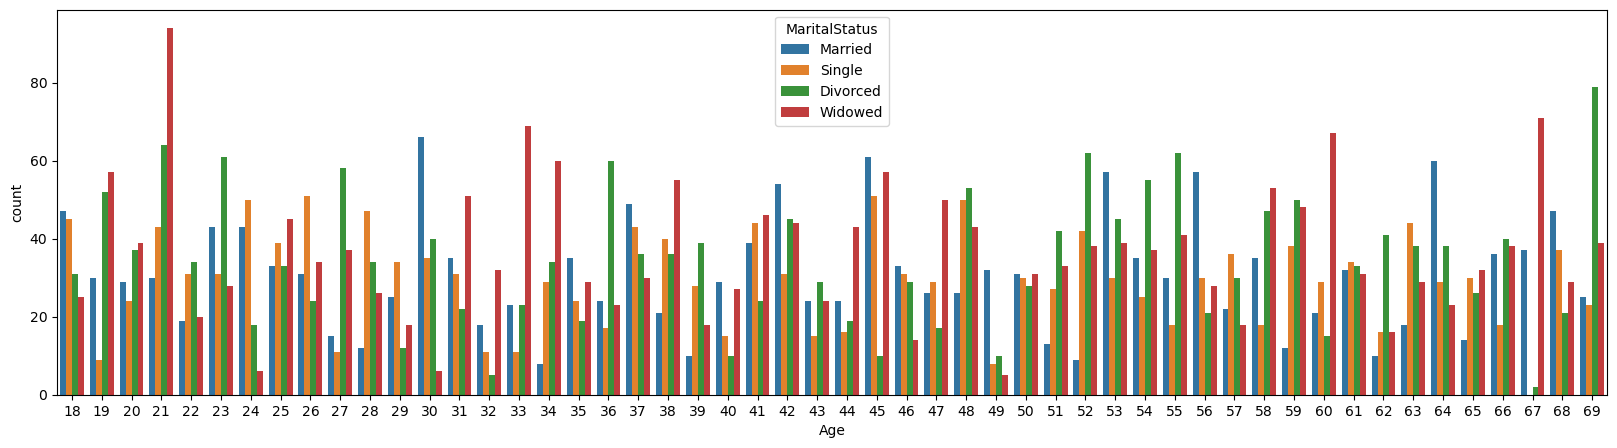

In [60]:
plt.figure(figsize=(20,5))
sns.barplot(data=Marital_Age, x='Age', y='count', hue='MaritalStatus')
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='Count'>

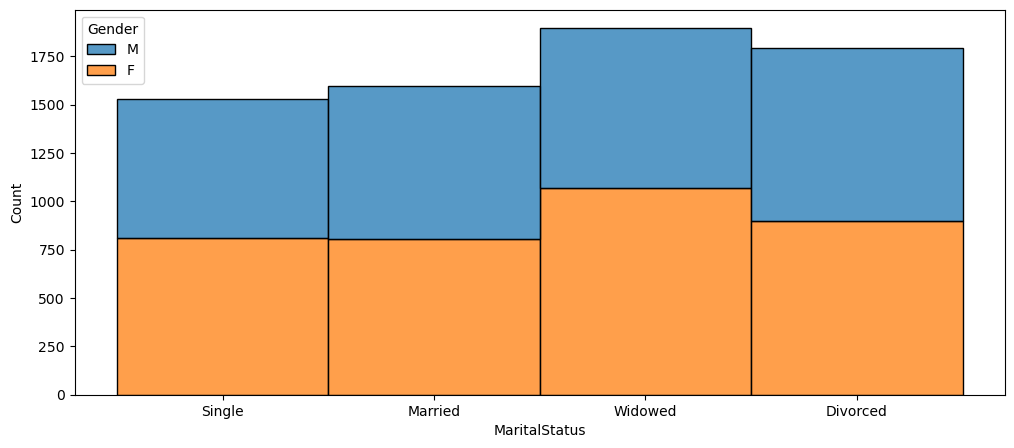

In [61]:
plt.figure(figsize=(12,5))
sns.histplot(data=new_df, x='MaritalStatus' ,hue='Gender', multiple='stack')

In [64]:
Income_Spent=new_df.groupby(['IncomeLevel','ProductCategory'])['AmountSpent'].sum().reset_index(name='count')
Income_Spent.head()

,IncomeLevel,ProductCategory,count
0,High,Books,121641.20
1,High,Clothing,110742.15
2,High,Electronics,119268.94
3,High,Furniture,120588.74
4,High,Groceries,116674.93


In [66]:
Income_Spent['ratio']=Income_Spent['count']/(Income_Spent.groupby('IncomeLevel')['count'].transform('sum'))
Income_Spent.head()

,IncomeLevel,ProductCategory,count,ratio
0,High,Books,121641.20,0.206551
1,High,Clothing,110742.15,0.188044
2,High,Electronics,119268.94,0.202523
3,High,Furniture,120588.74,0.204764
4,High,Groceries,116674.93,0.198118


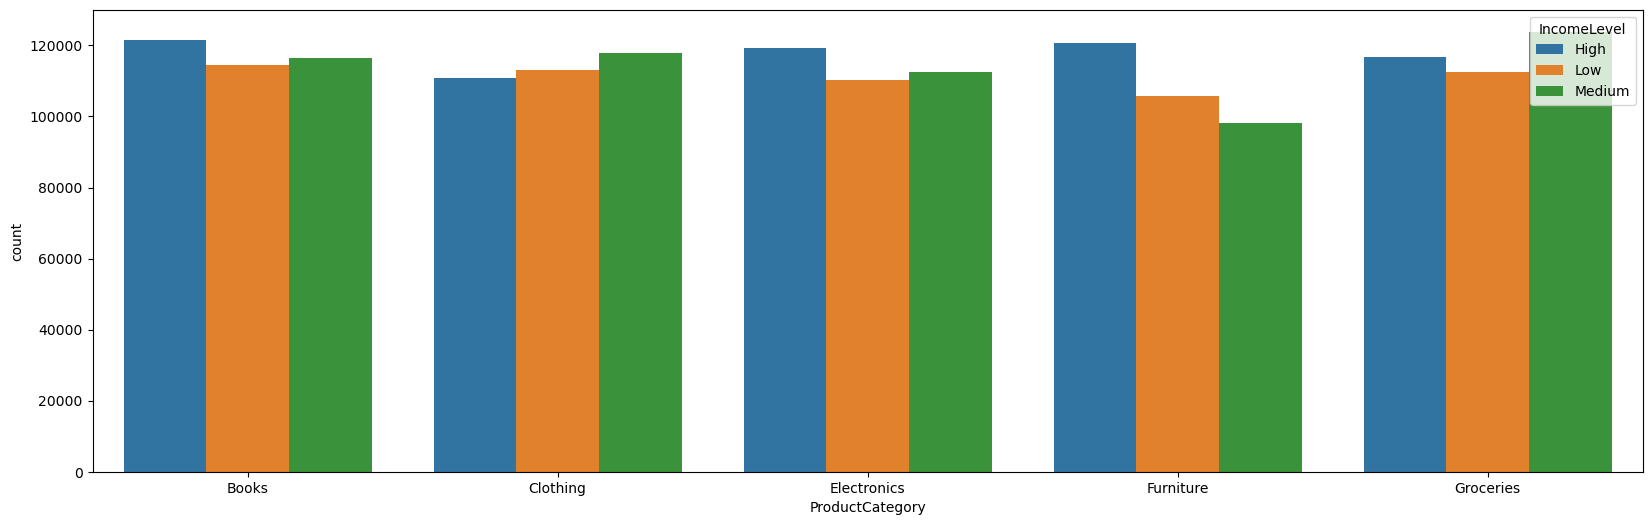

In [68]:
plt.figure(figsize=(20,6))
sns.barplot(data=Income_Spent, x='ProductCategory', y='count', hue='IncomeLevel')
plt.show()

In [69]:
Interaction=new_df.groupby('InteractionType')['ResolutionStatus'].value_counts().reset_index(name='count')
Interaction.head()

,InteractionType,ResolutionStatus,count
0,Complaint,Unresolved,928
1,Complaint,Resolved,841
2,Feedback,Resolved,1069
3,Feedback,Unresolved,852
4,Inquiry,Resolved,783


In [72]:
Interaction['ratio']=Interaction['count']/(Interaction.groupby('InteractionType')['count'].transform('sum'))
Interaction.head()

,InteractionType,ResolutionStatus,count,ratio
0,Complaint,Unresolved,928,0.524590
1,Complaint,Resolved,841,0.475410
2,Feedback,Resolved,1069,0.556481
3,Feedback,Unresolved,852,0.443519
4,Inquiry,Resolved,783,0.517173


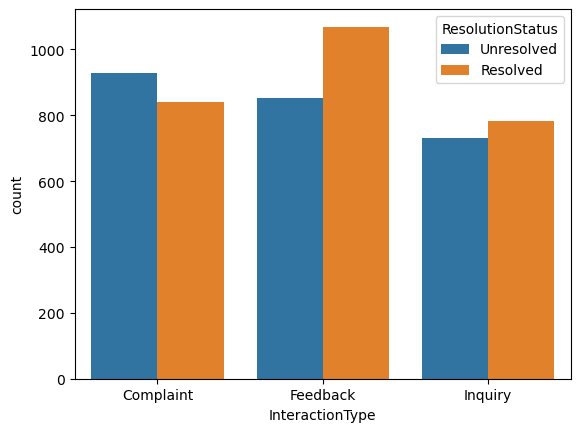

In [74]:
sns.barplot(data=Interaction, x='InteractionType', y='count', hue='ResolutionStatus')
plt.show()

In [76]:
service=new_df.groupby('ServiceUsage')['LoginFrequency'].value_counts().reset_index(name='count')
service.head()

,ServiceUsage,LoginFrequency,count
0,Mobile App,24,83
1,Mobile App,43,82
2,Mobile App,8,80
3,Mobile App,34,78
4,Mobile App,4,74


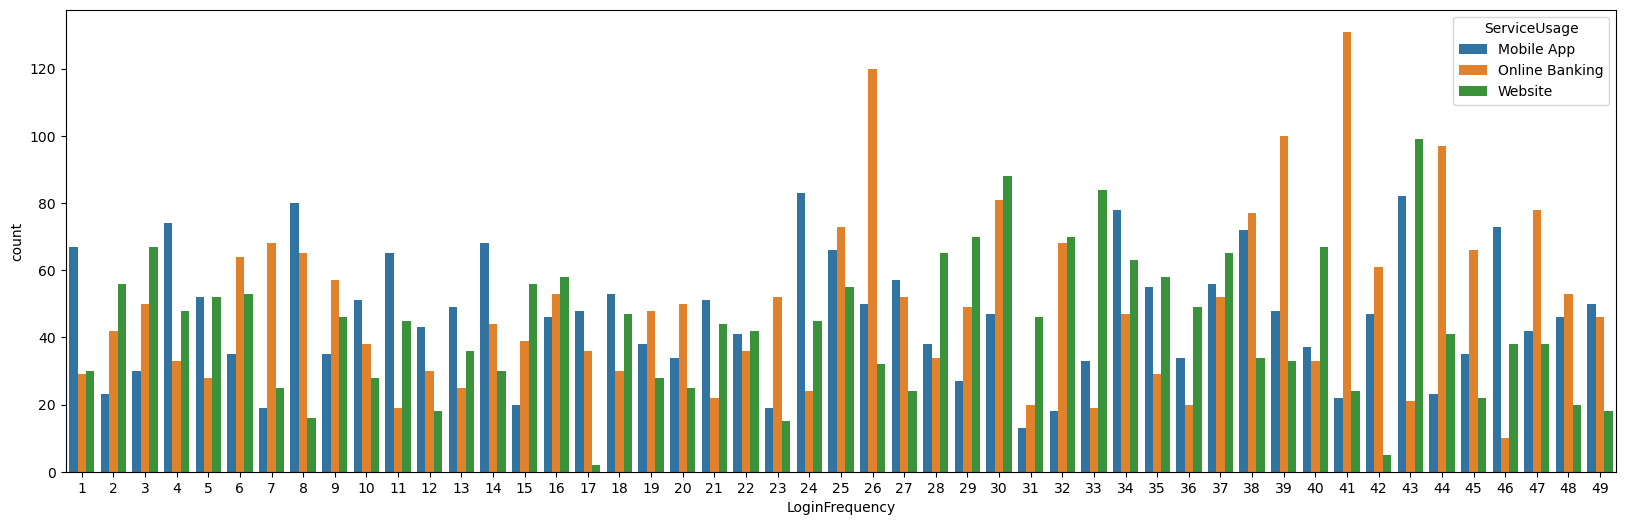

In [78]:
plt.figure(figsize=(20,6))
sns.barplot(data=service, x='LoginFrequency', y='count', hue='ServiceUsage')
plt.show()

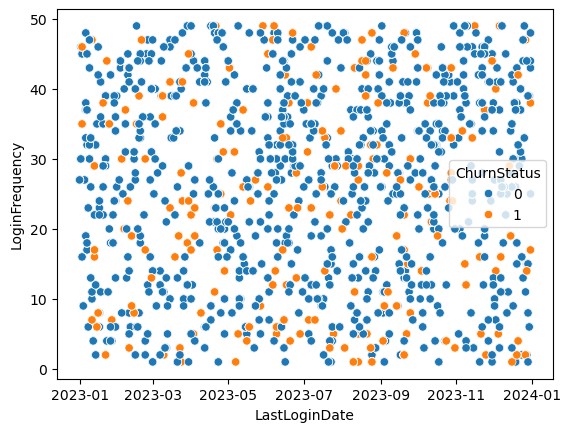

In [80]:
sns.scatterplot(data=new_df, x='LastLoginDate', y='LoginFrequency', hue='ChurnStatus')
plt.show()

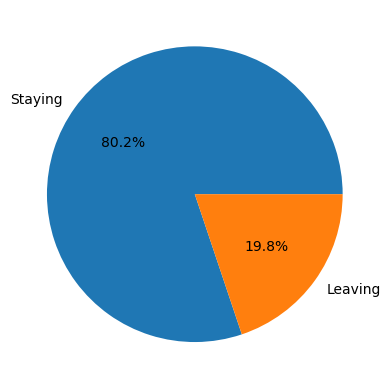

In [84]:
# Percentage of the churn rate in the dataset
plt.pie(new_df.groupby('ChurnStatus')['ChurnStatus'].value_counts(),  autopct='%1.1f%%', labels=['Staying', 'Leaving'])
plt.show()

In [86]:
date=new_df.groupby('LastLoginDate')['ChurnStatus'].value_counts().reset_index(name='count')

In [88]:
date.head()

,LastLoginDate,ChurnStatus,count
0,2023-01-01,0,9
1,2023-01-02,0,11
2,2023-01-03,0,36
3,2023-01-03,1,8
4,2023-01-04,0,9


In [90]:
date['year']=date['LastLoginDate'].dt.year
date['month']=date['LastLoginDate'].dt.month
date['day']=date['LastLoginDate'].dt.day

In [92]:
date.head()

,LastLoginDate,ChurnStatus,count,year,month,day
0,2023-01-01,0,9,2023,1,1
1,2023-01-02,0,11,2023,1,2
2,2023-01-03,0,36,2023,1,3
3,2023-01-03,1,8,2023,1,3
4,2023-01-04,0,9,2023,1,4


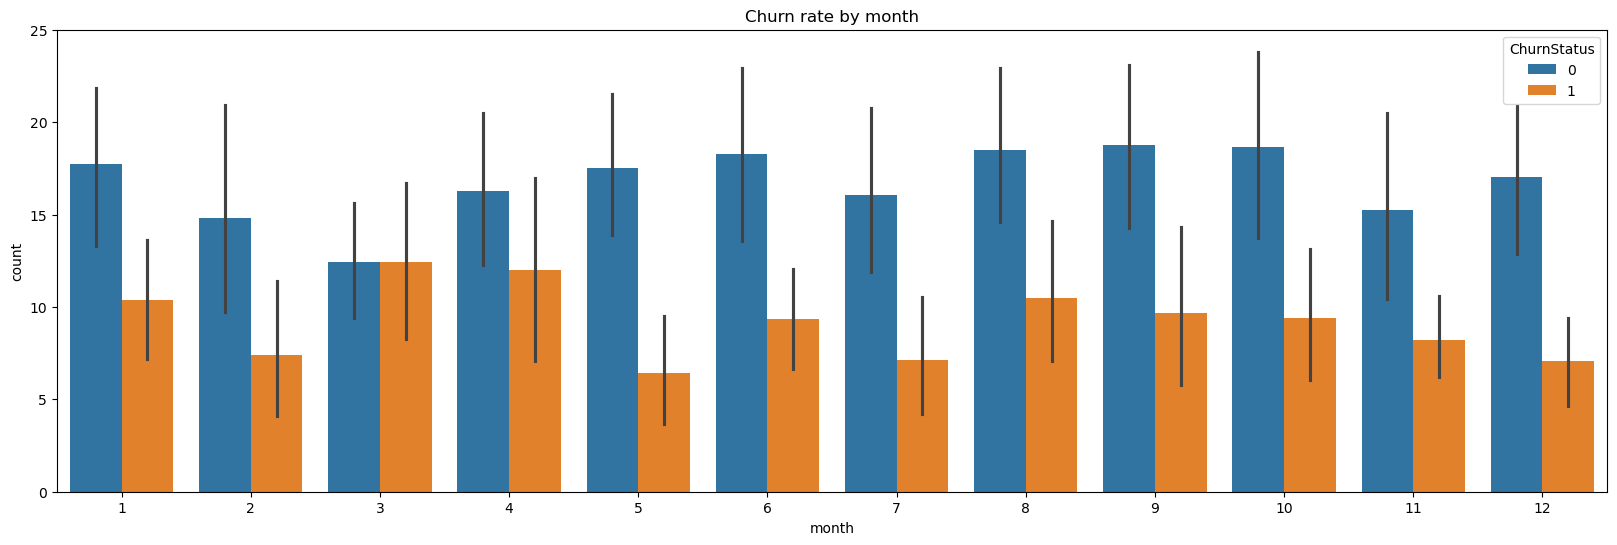

In [96]:
# The visualization of the churn and retention in different mont
plt.figure(figsize=(20,6))
sns.barplot( data=date, x='month', y='count', hue='ChurnStatus')
plt.title('Churn rate by month')
plt.show()

# Feature Engineering

In [107]:
new_df.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'TransactionID', 'TransactionDate', 'AmountSpent', 'ProductCategory',
       'InteractionID', 'InteractionDate', 'InteractionType',
       'ResolutionStatus', 'LastLoginDate', 'LoginFrequency', 'ServiceUsage',
       'ChurnStatus'],
      dtype='object')

In [109]:
model_df=new_df.drop(['CustomerID','TransactionID','TransactionDate','InteractionID','InteractionDate','LastLoginDate'], axis=1)

In [111]:
model_df.head()

,Age,Gender,MaritalStatus,IncomeLevel,AmountSpent,ProductCategory,InteractionType,ResolutionStatus,LoginFrequency,ServiceUsage,ChurnStatus
0,62,M,Single,Low,416.50,Electronics,Inquiry,Resolved,34,Mobile App,0
1,65,M,Married,Low,54.96,Clothing,Inquiry,Resolved,5,Website,1
2,65,M,Married,Low,197.50,Electronics,Inquiry,Resolved,5,Website,1
3,65,M,Married,Low,101.31,Furniture,Inquiry,Resolved,5,Website,1
4,65,M,Married,Low,397.37,Clothing,Inquiry,Resolved,5,Website,1


In [113]:
model_df.isnull().sum()

Age                    0
Gender                 0
MaritalStatus          0
IncomeLevel            0
AmountSpent            0
ProductCategory        0
InteractionType     1608
ResolutionStatus    1608
LoginFrequency         0
ServiceUsage           0
ChurnStatus            0
dtype: int64

In [115]:
# importing all the possible important libraries for data transformtion, cleaning, training and testing

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [117]:
ct=ColumnTransformer([
    ('tr1',SimpleImputer(strategy='most_frequent'),['InteractionType','ResolutionStatus'])],
                     remainder='passthrough')

In [119]:
model_df_trans=pd.DataFrame(ct.fit_transform(model_df))

In [121]:
model_df_trans

,0,1,2,3,4,5,6,7,8,9,10
0,Inquiry,Resolved,62,M,Single,Low,416.5,Electronics,34,Mobile App,0
1,Inquiry,Resolved,65,M,Married,Low,54.96,Clothing,5,Website,1
2,Inquiry,Resolved,65,M,Married,Low,197.5,Electronics,5,Website,1
3,Inquiry,Resolved,65,M,Married,Low,101.31,Furniture,5,Website,1
4,Inquiry,Resolved,65,M,Married,Low,397.37,Clothing,5,Website,1
...,...,...,...,...,...,...,...,...,...,...,...
6807,Feedback,Resolved,34,M,Widowed,Low,232.06,Groceries,22,Mobile App,0
6808,Feedback,Resolved,34,M,Widowed,Low,324.98,Books,22,Mobile App,0
6809,Feedback,Resolved,34,M,Widowed,Low,375.34,Groceries,22,Mobile App,0
6810,Feedback,Resolved,34,M,Widowed,Low,166.73,Books,22,Mobile App,0


In [123]:

ct1=ColumnTransformer([
    ('tr2',OrdinalEncoder(),[0,1,3,4,5,7,9]),
    ('tr3',StandardScaler(),[2,6,8])],
                     remainder='passthrough')

In [125]:
new_df_trans=pd.DataFrame(ct1.fit_transform(model_df_trans, ))

In [127]:
new_df_trans.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.0,0.0,1.0,2.0,1.0,2.0,0.0,1.225036,1.153881,0.588556,0
1,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.421298,-1.376296,-1.473886,1
2,2.0,0.0,1.0,1.0,1.0,2.0,2.0,1.421298,-0.378753,-1.473886,1
3,2.0,0.0,1.0,1.0,1.0,3.0,2.0,1.421298,-1.051923,-1.473886,1
4,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.421298,1.020003,-1.473886,1


In [129]:
new=new_df_trans.astype(int)

In [131]:
new.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2,0,1,2,1,2,0,1,1,0,0
1,2,0,1,1,1,1,2,1,-1,-1,1
2,2,0,1,1,1,2,2,1,0,-1,1
3,2,0,1,1,1,3,2,1,-1,-1,1
4,2,0,1,1,1,1,2,1,1,-1,1


In [135]:
# Spliting data into the training and testing dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(new.drop(10, axis=1), new[10], test_size=0.2)

In [139]:
# Since the result of the dataset is categorical so we are using catrgorical model Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=42)

In [141]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [143]:
y_pred=rf.predict(x_test)

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9200293470286134

In [147]:
from sklearn.model_selection import cross_val_score

In [149]:
cross_val_score(rf, x_train, y_train).mean()

0.8895205600626784

In [153]:
# Storing the output data into the churn.csv file
pd.DataFrame(y_pred).to_csv('churn.csv', index=False)